<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/TaskWeek6/K_Means_Clustering_menggunakan_google_colab_dengan_Mall_Customers_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

connect colab ke drive

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


membaca dataset dari drive dan mengubahnya menjadi dataframe

In [4]:
# Path ke file dataset di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/dataset/Mall_Customers.csv'

# Membaca dataset dan membuat DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


dataframe ang saya miliki bernama df dan memiliki atribut sebagai berikut
CustomerID	Gender	Age	Annual Income (k$)	Spending Score (1-100)

beri kode untuk merubah nama atribute Annual Income (k$)	Spending Score (1-100) menjadi Annual Income	Spending Score

In [5]:
# Mengganti nama kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Menampilkan DataFrame setelah perubahan nama kolom
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


beri kode untuk menghapus atribut customerid dan gender

In [6]:
# Menghapus kolom 'CustomerID' dan 'Gender'
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Menampilkan DataFrame setelah menghapus kolom
df.head()


,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


beri kode untuk memvisualisasikan elbow method dengan maksimal jumlah data k = 10 dengan atribut terbaru diatas

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

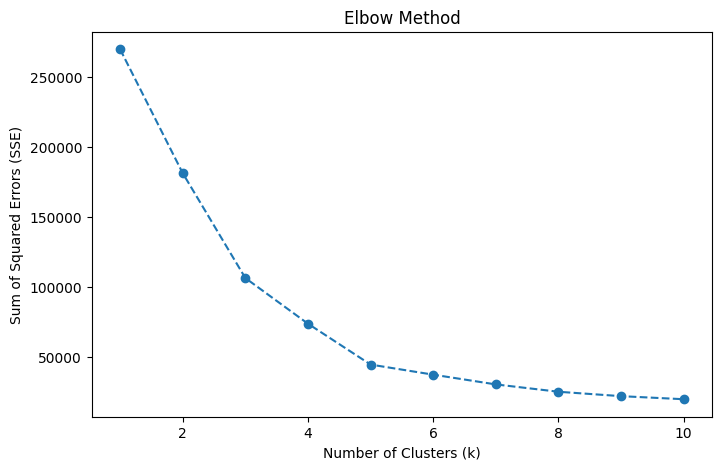

In [8]:
# Mengambil atribut yang akan digunakan untuk clustering
data_for_clustering = df[['Annual Income', 'Spending Score']]

# Inisialisasi nilai SSE (Sum of Squared Errors)
sse = []

# Melakukan iterasi untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    sse.append(kmeans.inertia_)

# Memvisualisasikan Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

beri kode untuk membuat kmeans dengan atribute di atas, jumlah cluster = 5 dan buat kolom baru bernama label dan visualisasikan berdasarkan label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


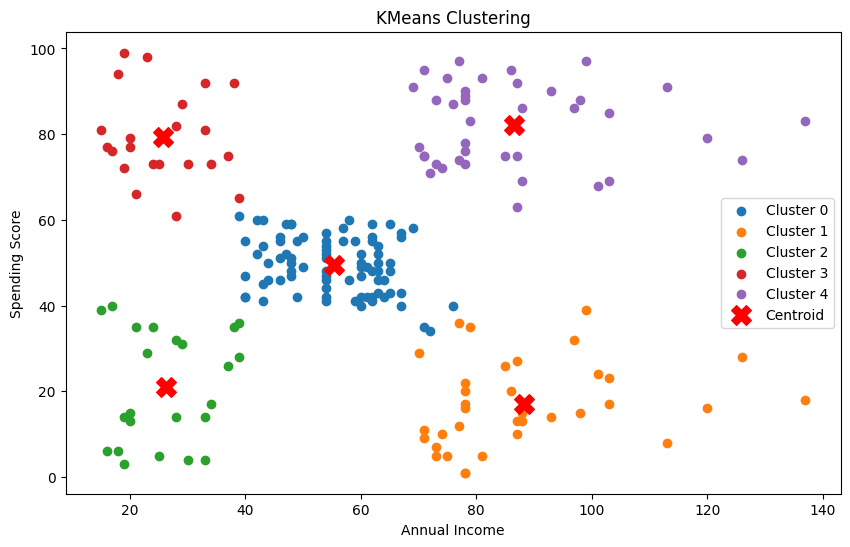

In [9]:
# Mengambil atribut yang akan digunakan untuk clustering
data_for_clustering = df[['Annual Income', 'Spending Score']]

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering dan menambahkan kolom 'Label' ke DataFrame
df['Label'] = kmeans.fit_predict(data_for_clustering)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Memvisualisasikan data untuk setiap kluster
for label in range(5):
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroid')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


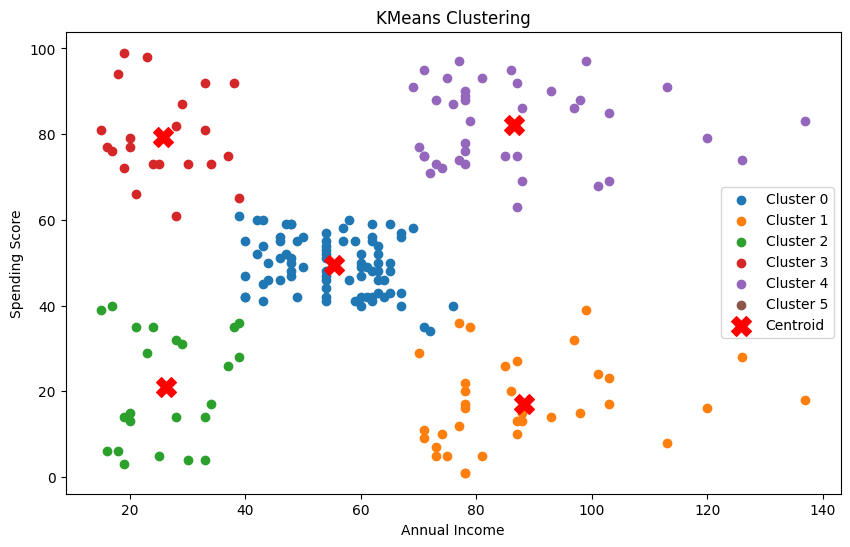

In [10]:
# Mengambil atribut yang akan digunakan untuk clustering
data_for_clustering = df[['Annual Income', 'Spending Score']]

# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan clustering dan menambahkan kolom 'Label' ke DataFrame
df['Label'] = kmeans.fit_predict(data_for_clustering)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Memvisualisasikan data untuk setiap kluster
for label in range(6):
    cluster_data = df[df['Label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

# Menampilkan centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroid')

plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


beri kode untuk menghubungkan silouet score dari k = 2 hingga k = 10 dan tampilkan nilai silhouette score untuk setiap nilai k

In [15]:
# Menyiapkan list untuk menyimpan nilai silhouette score
silhouette_scores = []

# Menghitung silhouette score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan nilai silhouette score untuk setiap nilai k
for k, score in zip(range(2, 11), silhouette_scores):
    print(f'For k = {k}, Silhouette Score = {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k = 2, Silhouette Score = 0.2969
For k = 3, Silhouette Score = 0.4676
For k = 4, Silhouette Score = 0.4932
For k = 5, Silhouette Score = 0.5539
For k = 6, Silhouette Score = 0.5398
For k = 7, Silhouette Score = 0.5264
For k = 8, Silhouette Score = 0.4583
For k = 9, Silhouette Score = 0.4554
For k = 10, Silhouette Score = 0.4593


beri kode untuk menghitung nilai Davies Bouldin index score untuk k = 2 hingga k = 10

In [17]:
# Menyiapkan list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    dbi_score = davies_bouldin_score(data_for_clustering, labels)
    dbi_scores.append(dbi_score)

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'For k = {k}, Davies-Bouldin Index = {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k = 2, Davies-Bouldin Index = 1.2568
For k = 3, Davies-Bouldin Index = 0.7153
For k = 4, Davies-Bouldin Index = 0.7104
For k = 5, Davies-Bouldin Index = 0.5726
For k = 6, Davies-Bouldin Index = 0.6522
For k = 7, Davies-Bouldin Index = 0.7204
For k = 8, Davies-Bouldin Index = 0.7511
For k = 9, Davies-Bouldin Index = 0.7579
For k = 10, Davies-Bouldin Index = 0.7590


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


beri kode untuk menghitung nilai Calinski-Harabasz index score untuk k = 2 hingga k = 10

In [19]:
# Menyiapkan list untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = []

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    chi_score = calinski_harabasz_score(data_for_clustering, labels)
    chi_scores.append(chi_score)

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, score in zip(range(2, 11), chi_scores):
    print(f'For k = {k}, Calinski-Harabasz Index = {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For k = 2, Calinski-Harabasz Index = 96.7465
For k = 3, Calinski-Harabasz Index = 151.5570
For k = 4, Calinski-Harabasz Index = 174.0644
For k = 5, Calinski-Harabasz Index = 247.3590
For k = 6, Calinski-Harabasz Index = 242.5376
For k = 7, Calinski-Harabasz Index = 254.8292
For k = 8, Calinski-Harabasz Index = 268.6393
For k = 9, Calinski-Harabasz Index = 270.9643
For k = 10, Calinski-Harabasz Index = 268.6197


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
